# Exercise Nine: Numbers
This week, you'll be exploring the GSS dataset we worked within in the "Social Stats" exercise. Using our demo and the textbook as a guide, pick three new variables to explore. Your workflow should:

Import the current version of the file (available for download at the link above), and isolate the columns of interest based on the variables you want to include

- Using the variable navigator provided by GSS, determine the years applicable and narrow your dataset accordingly.
- Visualize at least two quantiative relationships or patterns: these might include connections between clear numerical values, such as age and income,
  or more complex visualizations based on boolean data (for example, our "yes" and "no" to reading fiction.)
- Group the data using at least two different divisions to spot interesting trends, and plot at least one variance across a group (refer to our example
  of happiness among fiction readers as a starting point.)

For a bonus challenge, try running another analysis using an advanced method such as summary statistics or cross tabulation.


## Stage One: Imports and Narrows by Column and Year
Import the current version of the file (available for download at the link above), and isolate the columns of interest based on the variables you want to include


In [280]:
import pandas as pd

# we restrict this (very large) dataset to the variables of interest
columns = ['relig', 'year', 'id', 'occ', 'marital', 'agewed', 'divorce','sibs','age', 'sex','race', 'degree','prfmnce','artexbt']
df = pd.read_stata("GSS7218_R1.dta", columns=columns)

# further limit dataset to the years we are interested in
df = df.loc[df['year'].isin({1972, 2016})]
print(df.head)

<bound method NDFrame.head of             relig  year    id    occ        marital agewed divorce sibs   age  \
0          jewish  1972     1  205.0  NEVER MARRIED    NaN     NaN  3.0  23.0   
1        catholic  1972     2  441.0        married   21.0      no  4.0  70.0   
2      protestant  1972     3  270.0        married   20.0      no  5.0  48.0   
3           other  1972     4    1.0        married   24.0      no  5.0  27.0   
4      protestant  1972     5  385.0        married   22.0      no  2.0  61.0   
...           ...   ...   ...    ...            ...    ...     ...  ...   ...   
62461  protestant  2016  2863    NaN        married    NaN      no  3.0  57.0   
62462  protestant  2016  2864    NaN        widowed    NaN     yes  1.0  77.0   
62463  protestant  2016  2865    NaN        married    NaN      no  1.0  87.0   
62464    catholic  2016  2866    NaN        married    NaN      no  7.0  55.0   
62465        none  2016  2867    NaN        married    NaN     yes  2.0  72.0  

In [281]:
# limit dataset to exclude records from individuals who didn't answer this survey
df = df.loc[df['marital'].notna()]

#remove people with no value for age
df = df.loc[df['agewed'].notna()]
print(df.head)

<bound method NDFrame.head of            relig  year    id    occ   marital agewed divorce sibs   age  \
1       catholic  1972     2  441.0   married   21.0      no  4.0  70.0   
2     protestant  1972     3  270.0   married   20.0      no  5.0  48.0   
3          other  1972     4    1.0   married   24.0      no  5.0  27.0   
4     protestant  1972     5  385.0   married   22.0      no  2.0  61.0   
6       catholic  1972     7  522.0  divorced   22.0     NaN  7.0  28.0   
...          ...   ...   ...    ...       ...    ...     ...  ...   ...   
1608  protestant  1972  1609    NaN   married   17.0      no  7.0  69.0   
1609  protestant  1972  1610  926.0   widowed   18.0      no  5.0  74.0   
1610    catholic  1972  1611  280.0   married   18.0      no  1.0  35.0   
1611       other  1972  1612  410.0   married   21.0      no  4.0  22.0   
1612  protestant  1972  1613  715.0   married   24.0     yes  1.0  35.0   

         sex   race          degree prfmnce artexbt  
1       male  w

## Stage Two: Visualize Two Quantitative Aspects of the Data

Using the variable navigator provided by GSS, determine the years applicable and narrow your dataset accordingly.

22.149820788530466


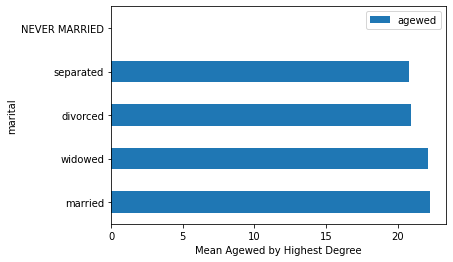

In [282]:
# df = df.replace('24 or older', 24)
df['agewed'] = pd.to_numeric(df['agewed'])
print(df['agewed'].mean())

import matplotlib.pyplot as plt
df.groupby('marital')['agewed'].mean().plot(kind='barh')
plt.xlabel('Mean Agewed by Highest Degree')
plt.legend();

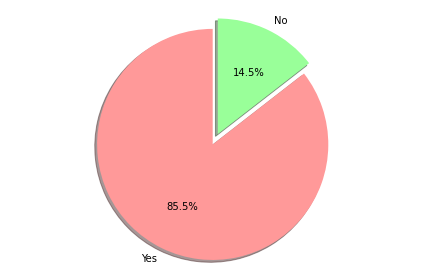

In [283]:

performance_counts = df['divorce'].value_counts()
labels=["Yes","No"]
colors=["#ff9999","#99ff99"]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(performance_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Stage Three: Use Groupby to Spot Additional Trends
Visualize at least two quantiative relationships or patterns: these might include connections between clear numerical values, such as age and income, or more complex visualizations based on boolean data (for example, our "yes" and "no" to reading fiction.)

In [284]:

exhibition_gender = df.groupby('relig')['age'].value_counts()
exhibition_gender

relig                               
protestant               30.0           29
                         49.0           28
                         45.0           27
                         60.0           24
                         29.0           23
                                        ..
INTER-NONDENOMINATIONAL  41.0            0
                         40.0            0
                         39.0            0
                         38.0            0
                         89 OR OLDER     0
Name: age, Length: 936, dtype: int64

In [285]:

exhibition_gender = df.groupby('relig')['sex'].value_counts()
exhibition_gender

relig                          
protestant               female    485
                         male      425
catholic                 male      188
                         female    173
jewish                   female     24
                         male       21
none                     male       34
                         female     23
other                    female     12
                         male        8
buddhism                 male        0
                         female      0
hinduism                 male        0
                         female      0
OTHER EASTERN            male        0
                         female      0
MOSLEM/ISLAM             male        0
                         female      0
ORTHODOX-CHRISTIAN       male        0
                         female      0
christian                male        0
                         female      0
NATIVE AMERICAN          male        0
                         female      0
INTER-NONDENOMINATIONAL  male   

C:\Users\dlawb\AppData\Local\Temp/ipykernel_21568/1868125460.py:11: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(exhibition_counts, labels=labels, colors=colors, startangle=90,frame=True)


ValueError: 'label' must be of length 'x'

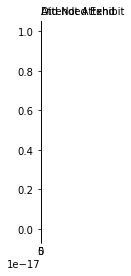

In [286]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['Attended Exhibit','Did Not Attend']
exhibition_counts = df['artexbt'].value_counts()
labels_gender = ['Female','Male','Female','Male']
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(exhibition_counts, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(exhibition_gender, labels=labels_gender, colors=colors_gender,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [270]:
df['prfmnce'] = df['prfmnce'].replace(['No', 'Yes'], [0, 1])
df['artexbt'] = df['artexbt'].replace(['No', 'Yes'], [0, 1])
df.head()

df.groupby('degree')['prfmnce'].mean().plot(kind='barh')
plt.xlabel('Performance Attended Mean by Highest Degree')
plt.legend();

KeyError: 'artexbt'

In [ ]:
df.groupby('degree')['artexbt'].mean().plot(kind='barh')
plt.xlabel('Exhibit Attended Mean by Highest Degree')
plt.legend();

## Stage Four: ?
Group the data using at least two different divisions to spot interesting trends, and plot at least one variance across a group (refer to our example of happiness among fiction readers as a starting point.)

## Bonus Stage:
For a bonus challenge, try running another analysis using an advanced method such as summary statistics or cross tabulation.

